## Wine Origin Country Classification

Italy and France are historically among the countries that produce the most prestigious wines worldwide. This dataset characterizes the Protected Designation of Origin(PDO) label wines produced in Italy and France at very high detail based on the official EU documents. In this project, I build a logistic regression model to predict the country of wine origin (IT/FR) based on features of the wine like colour, type and maximum allowed yields.

### Importing Libraries

In [352]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### Get the data

In [348]:
#Reading data
wine_data = pd.read_csv('/Users/vinayarao/Documents/Python Projects/Wine Logistic Regression/PDO_wine_data_IT_FR.csv', sep = ';')

In [349]:
wine_data.head()

,Country,PDOid,PDOnam,Registration,WineNam,Color,Category,Main_var,Second_var,Max_yield_hl,Max_yield_kg,Min_density,Info
0,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Bianco,White,Wine,Trebbiano Abruzzese B; Trebbiano Toscano B,Barbera Bianca B; Biancame B; Bombino Bianco B...,98,14000,2000,https://ec.europa.eu/info/food-farming-fisheri...
1,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Rosso,Red,Wine,Montepulciano N,Aglianico N; Barbera N; Cabernet Franc N; Cabe...,84,12000,2000,https://ec.europa.eu/info/food-farming-fisheri...
2,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Passito Bianco,White,Wine From Raisined Grapes,Malvasia Bianca Di Candia B; Malvasia Bianca L...,Barbera Bianca B; Biancame B; Bombino Bianco B...,98,14000,2000,https://ec.europa.eu/info/food-farming-fisheri...
3,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Passito Rosso,Red,Wine From Raisined Grapes,Montepulciano N,Aglianico N; Barbera N; Cabernet Franc N; Cabe...,84,12000,2000,https://ec.europa.eu/info/food-farming-fisheri...
4,IT,PDO-IT-A0880,Abruzzo,2011-12-16 00:00:00,Abruzzo Spumante Bianco Charmat,White,Sparkling Wine,Chardonnay B; Cococciola B; Montonico Bianco B...,Barbera Bianca B; Biancame B; Bombino Bianco B...,98,14000,2000,https://ec.europa.eu/info/food-farming-fisheri...


In [351]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       5489 non-null   object
 1   PDOid         5489 non-null   object
 2   PDOnam        5489 non-null   object
 3   Registration  5489 non-null   object
 4   WineNam       5489 non-null   object
 5   Color         5489 non-null   object
 6   Category      5489 non-null   object
 7   Main_var      5489 non-null   object
 8   Second_var    5489 non-null   object
 9   Max_yield_hl  5489 non-null   object
 10  Max_yield_kg  5489 non-null   object
 11  Min_density   5489 non-null   object
 12  Info          5489 non-null   object
dtypes: object(13)
memory usage: 557.6+ KB


### Exploratory Data Analysis

Using Seaborn to explore the data visually.

#### Countplot of Country

<Axes: xlabel='Country', ylabel='count'>

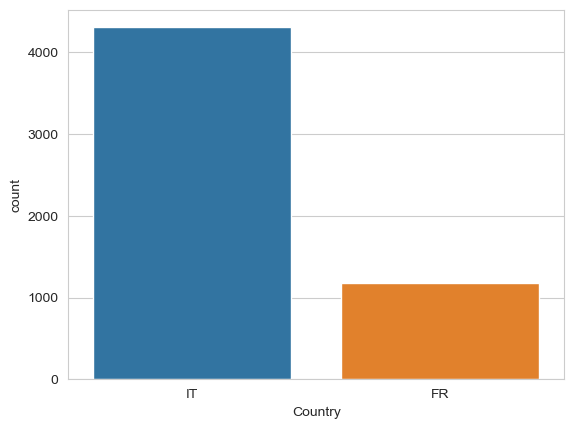

In [353]:
sns.countplot(data = wine_data, x = 'Country')

#### Countplot of Color

<Axes: xlabel='Color', ylabel='count'>

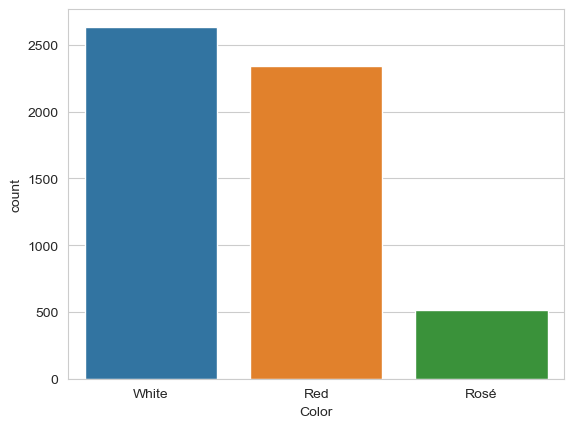

In [354]:
sns.countplot(data = wine_data, x = 'Color')

#### Countplot of Category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wine'),
  Text(1, 0, 'Wine From Raisined Grapes'),
  Text(2, 0, 'Sparkling Wine'),
  Text(3, 0, 'Quality Sparkling Wine'),
  Text(4, 0, 'Liqueur Wine'),
  Text(5, 0, 'Semi-Sparkling Wine'),
  Text(6, 0, 'Wine Of Overripe Grapes'),
  Text(7, 0, 'Partially Fermented Grape Must Extracted From Raisined Grapes'),
  Text(8, 0, 'Quality Aromatic Sparkling Wine'),
  Text(9, 0, 'Partially Fermented Grape Must')])

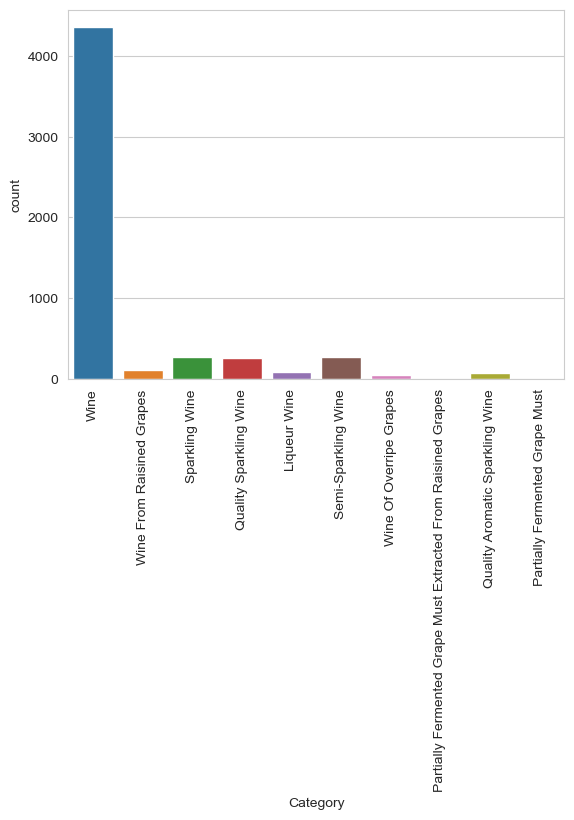

In [355]:
sns.countplot(data = wine_data, x = 'Category')
plt.xticks(rotation=90)

#### Exploring Maximum Yield Fields

In [356]:
wine_data['Max_yield_hl'].value_counts()

Max_yield_hl
na       1437
84        523
70        340
91        297
63        253
         ... 
81          1
44,1        1
62,5        1
56,25       1
8,1         1
Name: count, Length: 118, dtype: int64

#### Replacing Commas with Decimal Points in Max_yield_hl

In [357]:
wine_data['Max_yield_hl'] = wine_data['Max_yield_hl'].str.replace(',', '.')

#### Converting continuous variables to numeric data type

In [358]:
wine_data['Max_yield_kg'] = pd.to_numeric(wine_data['Max_yield_kg'], errors = 'coerce')
wine_data['Min_density'] = pd.to_numeric(wine_data['Min_density'], errors = 'coerce')
wine_data['Max_yield_hl'] = pd.to_numeric(wine_data['Max_yield_hl'], errors = 'coerce')

#### Feature Engineering: Extract year from registration field

In [302]:
wine_data['year'] = pd.DatetimeIndex(wine_data['Registration']).year

In [359]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       5489 non-null   object 
 1   PDOid         5489 non-null   object 
 2   PDOnam        5489 non-null   object 
 3   Registration  5489 non-null   object 
 4   WineNam       5489 non-null   object 
 5   Color         5489 non-null   object 
 6   Category      5489 non-null   object 
 7   Main_var      5489 non-null   object 
 8   Second_var    5489 non-null   object 
 9   Max_yield_hl  4052 non-null   float64
 10  Max_yield_kg  3958 non-null   float64
 11  Min_density   4702 non-null   float64
 12  Info          5489 non-null   object 
dtypes: float64(3), object(10)
memory usage: 557.6+ KB


#### Boxplot of Max_yield_kg by Color

<Axes: xlabel='Color', ylabel='Max_yield_kg'>

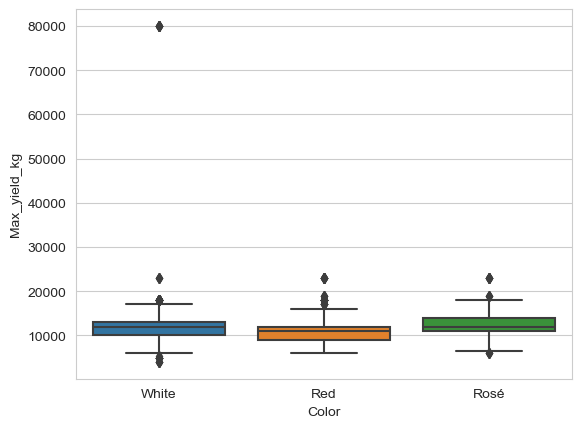

In [360]:
sns.boxplot(data = wine_data, x = 'Color', y = 'Max_yield_kg')

#### Boxplot of Max_yield_hl by Color

<Axes: xlabel='Color', ylabel='Max_yield_hl'>

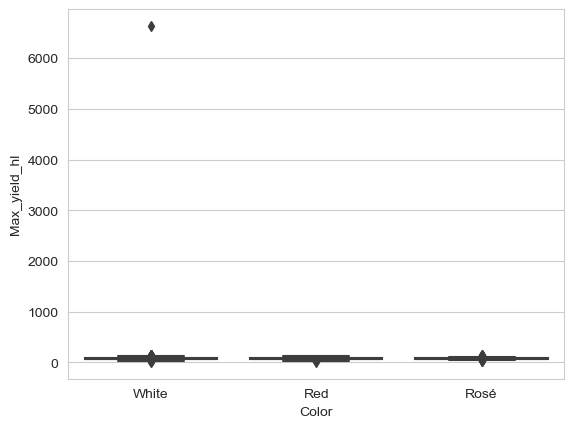

In [361]:
sns.boxplot(data = wine_data, x = 'Color', y = 'Max_yield_hl')

#### Boxplot of Min_density by Color

<Axes: xlabel='Color', ylabel='Min_density'>

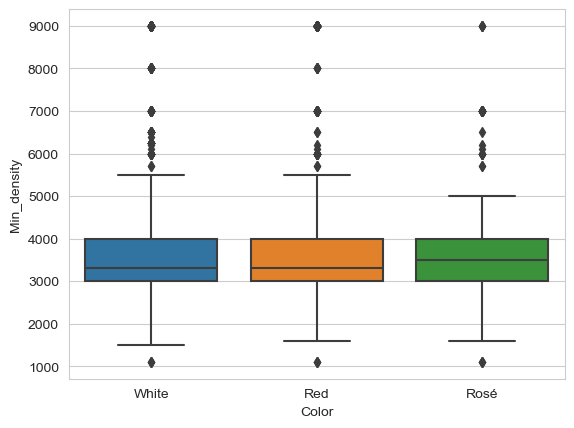

In [362]:
sns.boxplot(data = wine_data, x = 'Color', y = 'Min_density')

#### Max_yield_hl and Max_yield_kg have a few extreme outliers. Removing them fto have clean data.

In [363]:
wine_data[wine_data['Max_yield_hl'] > 1000]['Max_yield_hl'].value_counts()

Max_yield_hl
6635.0    1
Name: count, dtype: int64

In [364]:
wine_data[wine_data['Max_yield_kg'] > 25000]['Max_yield_kg'].value_counts()

Max_yield_kg
80000.0    7
Name: count, dtype: int64

In [365]:
wine_data = wine_data[(wine_data['Max_yield_hl'].isnull()) | (wine_data['Max_yield_hl'] < 1000)]

wine_data = wine_data[(wine_data['Max_yield_kg'].isnull()) | (wine_data['Max_yield_kg'] < 25000)]

#### Histplot of Max_yield_hl

<Axes: xlabel='Max_yield_hl', ylabel='Count'>

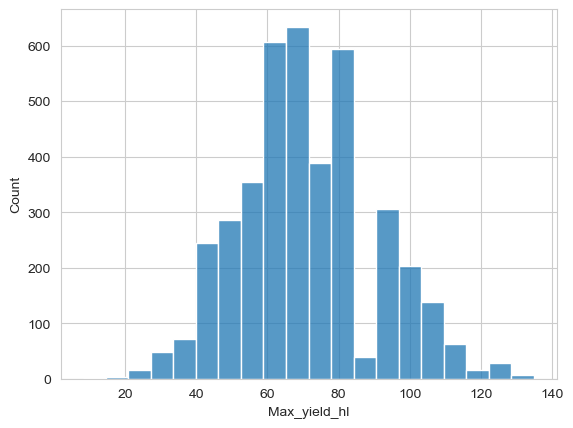

In [366]:
sns.histplot(wine_data['Max_yield_hl'], bins = 20)

#### Histplot of Max_yield_kg

<Axes: xlabel='Max_yield_kg', ylabel='Count'>

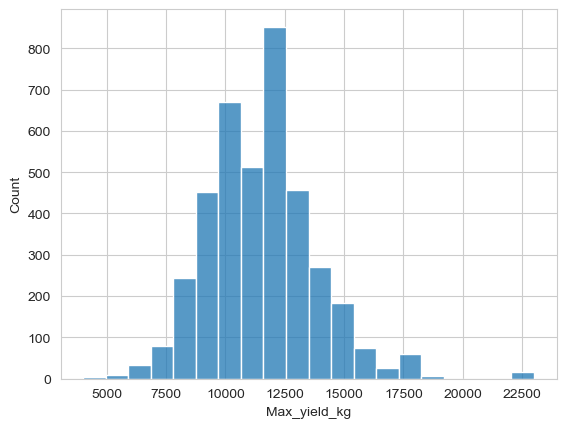

In [367]:
sns.histplot(wine_data['Max_yield_kg'], bins = 20)

#### Histplot of Min_density

<Axes: xlabel='Min_density', ylabel='Count'>

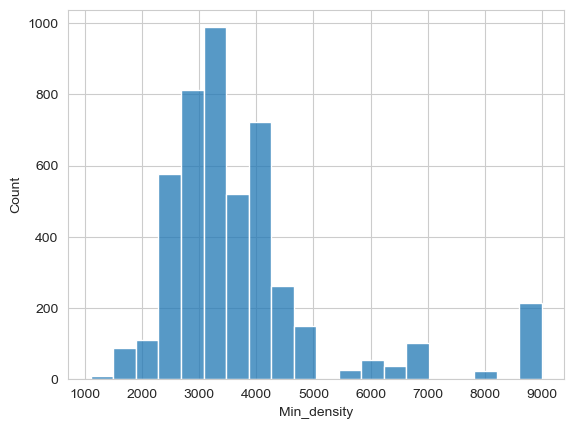

In [314]:
sns.histplot(wine_data['Min_density'], bins = 20)

In [368]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5481 entries, 0 to 5488
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       5481 non-null   object 
 1   PDOid         5481 non-null   object 
 2   PDOnam        5481 non-null   object 
 3   Registration  5481 non-null   object 
 4   WineNam       5481 non-null   object 
 5   Color         5481 non-null   object 
 6   Category      5481 non-null   object 
 7   Main_var      5481 non-null   object 
 8   Second_var    5481 non-null   object 
 9   Max_yield_hl  4044 non-null   float64
 10  Max_yield_kg  3950 non-null   float64
 11  Min_density   4694 non-null   float64
 12  Info          5481 non-null   object 
dtypes: float64(3), object(10)
memory usage: 599.5+ KB


### Handling Missing Data
#### Heatmap to visualize Null values

<Axes: >

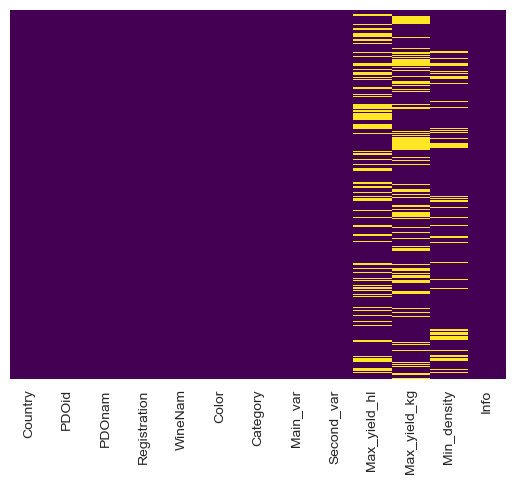

In [369]:
sns.heatmap(wine_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Imputing Null values with mean

In [371]:
wine_data['Max_yield_hl'] = wine_data['Max_yield_hl'].fillna(wine_data['Max_yield_hl'].mean())
wine_data['Max_yield_kg'] = wine_data['Max_yield_kg'].fillna(wine_data['Max_yield_kg'].mean())
wine_data['Min_density'] = wine_data['Min_density'].fillna(wine_data['Min_density'].mean())

#### Confirming null values are replaced

<Axes: >

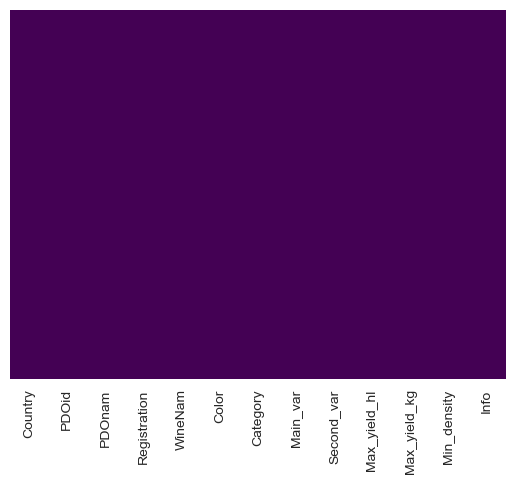

In [372]:
sns.heatmap(wine_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Replacing categorical variables with dummy variables

In [373]:
color = pd.get_dummies(wine_data['Color'], drop_first=True)
category = pd.get_dummies(wine_data['Category'], drop_first=True)
country = pd.get_dummies(wine_data['Country'], drop_first=True)
wine_data = pd.concat([wine_data, color, category], axis = 1)

In [375]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5481 entries, 0 to 5488
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country                                                        5481 non-null   object 
 1   PDOid                                                          5481 non-null   object 
 2   PDOnam                                                         5481 non-null   object 
 3   Registration                                                   5481 non-null   object 
 4   WineNam                                                        5481 non-null   object 
 5   Color                                                          5481 non-null   object 
 6   Category                                                       5481 non-null   object 
 7   Main_var                                                       54

### Logistic Regression
#### Selecting relevant predictor and target variables

In [377]:
X = wine_data.drop(['Country','PDOid', 'PDOnam', 'Registration', 'WineNam', 'Main_var', 'Second_var', 'Info', 'Color', 'Category'], axis = 1)
y = wine_data['Country']

#### Splitting data into train and test

In [337]:
from sklearn.model_selection import train_test_split

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Fitting Logistic Regression model to predict country

In [340]:
from sklearn.linear_model import LogisticRegression

In [341]:
logmodel = LogisticRegression()

In [379]:
logmodel.fit(X_train, y_train)

LogisticRegression()

#### Predicting output with test data

In [380]:
predictions = logmodel.predict(X_test)

#### Printing performance metrics

In [344]:
from sklearn.metrics import confusion_matrix, classification_report

In [345]:
confusion_matrix(y_test, predictions)

array([[ 289,   69],
       [  42, 1245]])

In [381]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          FR       0.71      0.64      0.67       355
          IT       0.90      0.93      0.92      1290

    accuracy                           0.87      1645
   macro avg       0.81      0.78      0.79      1645
weighted avg       0.86      0.87      0.86      1645

